# Gradiente para las redes RNN.
Creditos a
[Drive into Deep Learning](https://d2l.ai/chapter_recurrent-neural-networks/bptt.html).

De la clase anterior:
$$\frac{\partial C_k}{\partial \theta_h} = \frac{\partial C_k}{\partial \hat{y}_{t}} \frac{\partial \hat{y}}{\partial h_t} \frac{\partial h_t}{\partial \theta_h}.$$

El factor mas complicado de esta expresion es $\partial h/\partial \theta_k$.
Estudiamos este primero.





De la clase anterior:
$$ h_t = f(x_t, h_{t-1}, \theta_x, \theta_h).$$
$$ y_k = g(h_t, \theta_y) .$$


$$\frac{\partial h_t}{\partial \theta_h} = \frac{\partial f(x_t, h_{t-1}, \theta_x, \theta_h)}{\partial \theta_h} + \frac{\partial f(x_t, h_{t-1}, \theta_x, \theta_h)}{\partial h_{t-1}} \frac{\partial h_{t-1}}{\partial \theta_h}.$$


Si aceptamos la formula anterior, entonces tenemos una recursion.


$$ a_t = b_t + c_t a_{t-1} \tag{1} .$$
donde
$$ a_t = \frac{\partial h_t}{\partial \theta_h} \quad, \quad b_t =\frac{\partial f(x_t, h_{t-1}, \theta_x, \theta_h)}{\partial \theta_h} \quad , \quad
.$$

$$ c_t =\frac{\partial f(x_t, h_{t-1}, \theta_x, \theta_h)}{\partial h_{t-1}} \quad , \quad $$

Resolvamos esta recursion.
Condicion inicial $a_0=0$ (verficamos que esta condicion inicial es valida)
Condicionnin inicial $t_a_0a_a_0-==0$ (verficiamos camos que esta condicion inicial es valida.)

De la ecuacion (1)

\begin{eqnarray}
a_1 &=& b_1  \\
a_2 &=& b_2 + c_2 a_1  = b_2 + c_2 b_1 \\
a_3 &=& b_3 + c_3 a_2  = b_3 + c_3 (b_2 + c_2 b_1) = b_3 + c_3 b_2 + c_3 c_2 b_1 \\
a_4 &=& b_4 + c_4 a_3 = b_4 + c_4 b_3 + c_4 c_3 b_2 + c_4 c_3 c_2 b_1 \\
&\vdots & \\
a_t &=& b_t + \sum_{i=1}^{t-1} b_i  \prod_{j=i+1}^t c_j
\end{eqnarray}

De donde

$$\frac{\partial h_t}{\partial \theta_h} =
\frac{\partial f(x_t, h_{t-1}, \theta_x, \theta_h)}{\partial \theta_h} + \sum_{i=1}^t  
\frac{\partial f(x_i, h_{i-1}, \theta_x,
\theta_h)}{\partial h_{i-1}} \prod_{j=i+1}^t \frac{\partial f(x_i, h_{j-1}, \theta_x, \theta_h)}{\partial \theta_h}. \tag{0}$$

Verifiquemos que la condicion inicial esta bien. si $a_0=0$, entonces para $t=1$
tenemos

$h_1 = f(x_1, h_0, \theta_x, \theta_h)$
y

$$ \frac{\partial h_1}{\partial \theta_h} = \frac{\partial f(x_1, 0, \theta_x, \theta_h)}{\partial \theta_h}  .$$

Ahora la derivada $\partial h_t / \partial \theta_x$. Reescribamos las ecuaciones de propagacion de forma mas eplicita.



\begin{eqnarray}
f(x_t, h_{t-1}, W, \Theta) &=& f( W x_t + \Theta h_{t-1}) \\
\hat{y} = g(h_t, U) &=& g(U h_t).
\end{eqnarray}
Estamos usando la linealidad (lo que llamamos $z$ en ML) y notamos
$(\theta_x, \theta_h, \theta_y)=(W, \Theta, U)$.
Ahora $f,g$ pueden ser funciones vectoriales (es decir $f=(f_1, f_2, \cdots, f_k)$ y lo mismo con $g$. De la clase anterior.

$$\frac{\partial C_k}{\partial \theta_x} = \frac{\partial C_k}{\partial \hat{y}_{t}} \frac{\partial \hat{y}}{\partial h_t} \frac{\partial h_t}{\partial \theta_x}.$$

El vector
$$ \frac{\partial C_k}{\partial \hat{y}_t} .$$
no tiene problema por que $C_k$ es la funcion de costo que es analitica.
Ahora

$$\frac{\partial \hat{y}_t}{\partial h_t} = \frac{\partial g}{\partial h_t} .$$
con $x=U h_t$, tenemos que


$$ \frac{\partial g}{\partial h_t} =  \frac{\partial g}{\partial x} U .$$
Aca $\partial g / partial x$ es un vector transpuesto

Como $f$ puede ser vectorial, dejeme usar el subindice $f_r$ y calculemos
usando la regla de la cadena.

$$ \frac{\partial f_r}{\partial W} = \frac{\partial f_r}{\partial \xi_j} \frac{\partial \xi_j}{\partial W}. \tag{2} $$
donde $\xi = W x_t + \Theta h_{t-1}$, de forma que si tomamos indices
$$\xi_j = W_{jk}(x_t)_k + \Theta_{jk} (h_{t-1})_k .$$ (notacion de Einstein).

Tomando las derivadas parciales:

$$\frac{\partial \xi_j}{\partial W_{pq}} = \delta_{jp} \delta_{kq} (x_t)_k =  \delta_{jp} (x_t)_q .$$

Reemplazando en (2)


$$ \frac{\partial f_r}{\partial W_{pq}} = \frac{\partial f_r}{\partial \xi_j} \delta_{jp} (x_t)_q = \frac{\partial f_r}{\partial \xi_p} (x_t)_q .$$

La tarea para usted (un solo problema es probar)

$$ \frac{\partial f_r}{\partial \Theta_{pq}} =   \frac{\partial f_r}{\partial \xi_p} (h_{t-1})_q .$$


En la ecuacion (0) nos falta el termino inmediatamente despues de la sumatoria.

Es decir
$$ \frac{\partial x_t, h_{j-1}, \theta_x, \theta_h}{\partial h_{j-1}} .$$

Usamos la misma estragetia de arriba y escribimos


$$\xi = W x_t + \Theta h_{t-1} \\ .$$
$$\xi_j = (W x_t)_j + (\Theta h_{t-1})_j = W_{jk}(x_t)_k + \Theta_{jk}(h_{t-1})_k \\ .$$

Encontramos

$$ \frac{\partial f_r}{\partial (h_{j-1})_s} = \frac{\partial f_r}{\partial \xi_p} \frac{\partial \xi_p}{\partial (h_{t-1})_s} = \frac{\partial f_r}{\partial \xi_p} \Theta_{kp} \delta_{ks} =  \frac{\partial f_r}{\partial \xi_p} \Theta_{ps} .$$

De forma matricial
$$\frac{\partial f_r}{\partial \Theta } = \frac{\partial f_r}{\partial \xi} \Theta .$$

Lo obtenido aca nos sirve para explicar el concepto de "exploing" y "vanishing" gradient.

Vemos que en gradiente resulta la matriz $\Theta$. Por que es esto importante? por que al aplicar esto muchas veces, la matriz se va a exponenciar, por decir algo luego que $T$ recursiones la matriz obtenida es

$$ \Theta^T .$$

La exponenciacion de una matriz la puede hacer crecer sin limites o irse a cero. Para esto se estudia el radio espectral (spectral radius $\rho(Theta)).

* Si al elevar una matriz a una potencia, el radio espectral es mayor que 1 ($\rho(\Theta)>1$), la matriz crece.  Esto
esta en sintonia con el exploding gradient.
* Si al elevar una matriz a una potencia, el radio espectral es menor que 1 ($\rho(\Theta) < 1$), la matriz decrece.  Esto va en sintonia con el problema de vanishing gradient.

Muy parecido a lo que pasa con los numeros (positivos).
$x^t$ si $x < 1$ entonce $x^t \to 0$, $t \to \infty$
Si $x^t>1$ entonces $x^t \to \infty$, $t \to \infty$.


Como aliviamos entonces el problema del vanishing/exploding gradient.

* **Gradient Clipping**: Se puede truncar el gradiente cuando pase de cierto humbral.  No es nada elegante pero lo estabiliza (si es exploding),
si es vanishing, cliping puede ser por debajo.

* **Regularizacion**. Batch normalizacion, dropout, etc.

* **Funciones de activacion**: La ReLU u otroas que no sean como la logistic o la tanh.

* **Pesos iniciales**.  Hay un articulo (ver las notas) Xavier Initializacion.
(de Xavier y Benjio), 2010 (ver notas). Iniciamente los pesos deben ser normalizados con media cero y variacion estandard.




$$ \sigma= \frac{2}{n_{in} + n_{out}} $$.
donde $n_{in}$ es el numero de nodos (neuronas) que entran y $n_{out}$ el numero de neuronas que salen. Veamos una grafica de su articulo.

* **Gated Cells**: Esta es la idea central del metodo de LSTM
que veremos en la proxima clase.






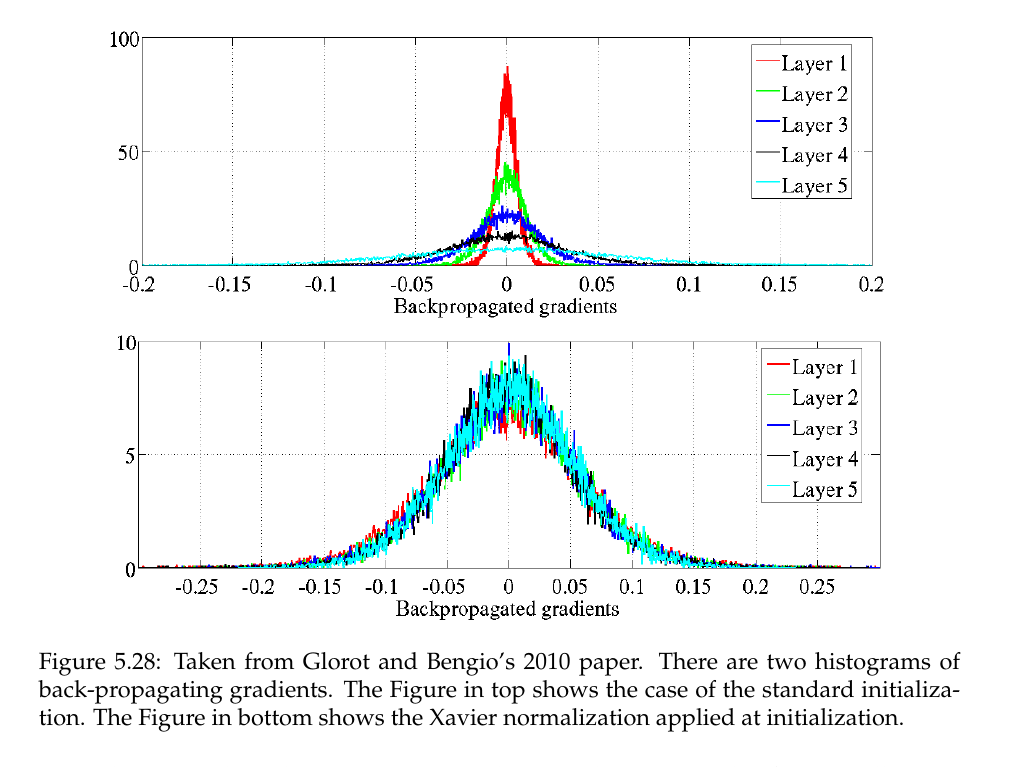